## Data visualization cheat sheet 1
I used this notebook to experiment and play with some visualization

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Playing with cleaned_automobile.csv
Cars specification and price

In [66]:
df = pd.read_csv("cleaned_automobile.csv",index_col=0)

In [67]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                  int64
city_L/100km         float64
highway_L/100km      float64
fuel_type_diesel       int64
fuel_type_gas          int64
aspiration_std         int64
aspiration_turbo       int64
horsepower_binned     object
dtype: object

In [68]:
df["fuel_system"]

0      mpfi
1      mpfi
2      mpfi
3      mpfi
4      mpfi
       ... 
196    mpfi
197    mpfi
198    mpfi
199     idi
200    mpfi
Name: fuel_system, Length: 201, dtype: object

In [69]:
plt.style.use("ggplot")

Price distribution based on different wheel drive type (boxplot)

fwd    118
rwd     75
4wd      8
Name: drive_wheels, dtype: int64

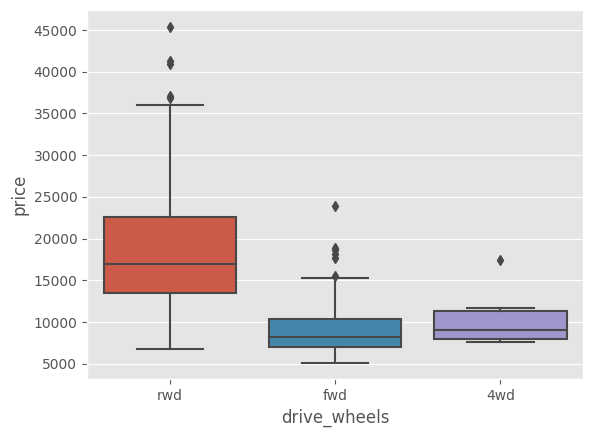

In [70]:
sns.boxplot(x="drive_wheels",y="price",data=df)
df["drive_wheels"].value_counts()

Relations between different categorical variables based on price (heatmap)

In [71]:
pivot = df.pivot_table(index="drive_wheels",columns="body_style",values="price",aggfunc="mean")
pivot

body_style,convertible,hardtop,hatchback,sedan,wagon
drive_wheels,,,,,
4wd,NaN,NaN,7603.000000,12647.333333,9095.750000
fwd,11595.0,8249.000000,8396.387755,9811.800000,9997.333333
rwd,23949.6,24202.714286,14337.777778,21711.833333,16994.222222


<AxesSubplot: xlabel='body_style', ylabel='drive_wheels'>

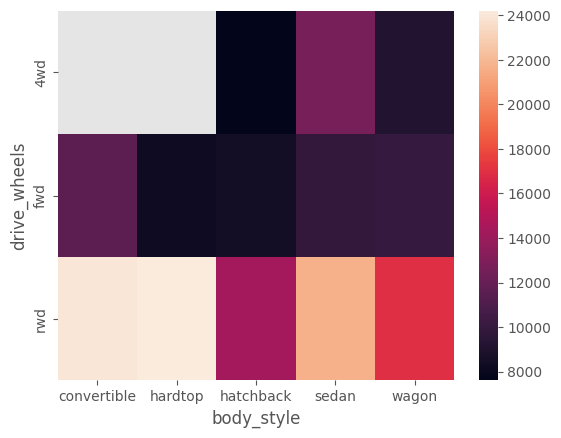

In [72]:
sns.heatmap(pivot)

In [73]:
pivot2 = df.pivot_table(index="make",columns="body_style",values="price").dropna(thresh=3)

<AxesSubplot: xlabel='body_style', ylabel='make'>

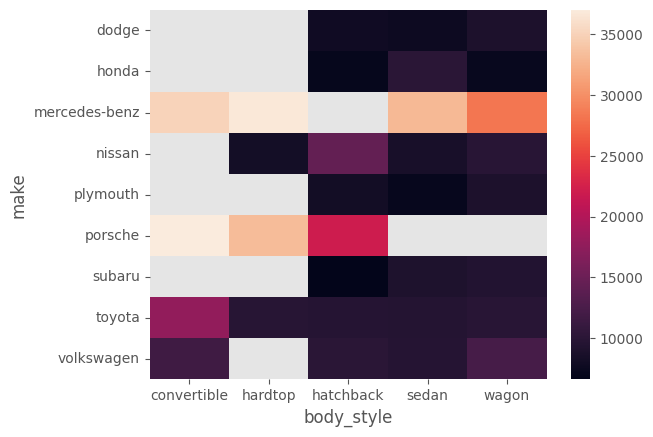

In [74]:
sns.heatmap(pivot2)

Making dashboard and some correlation visualizations

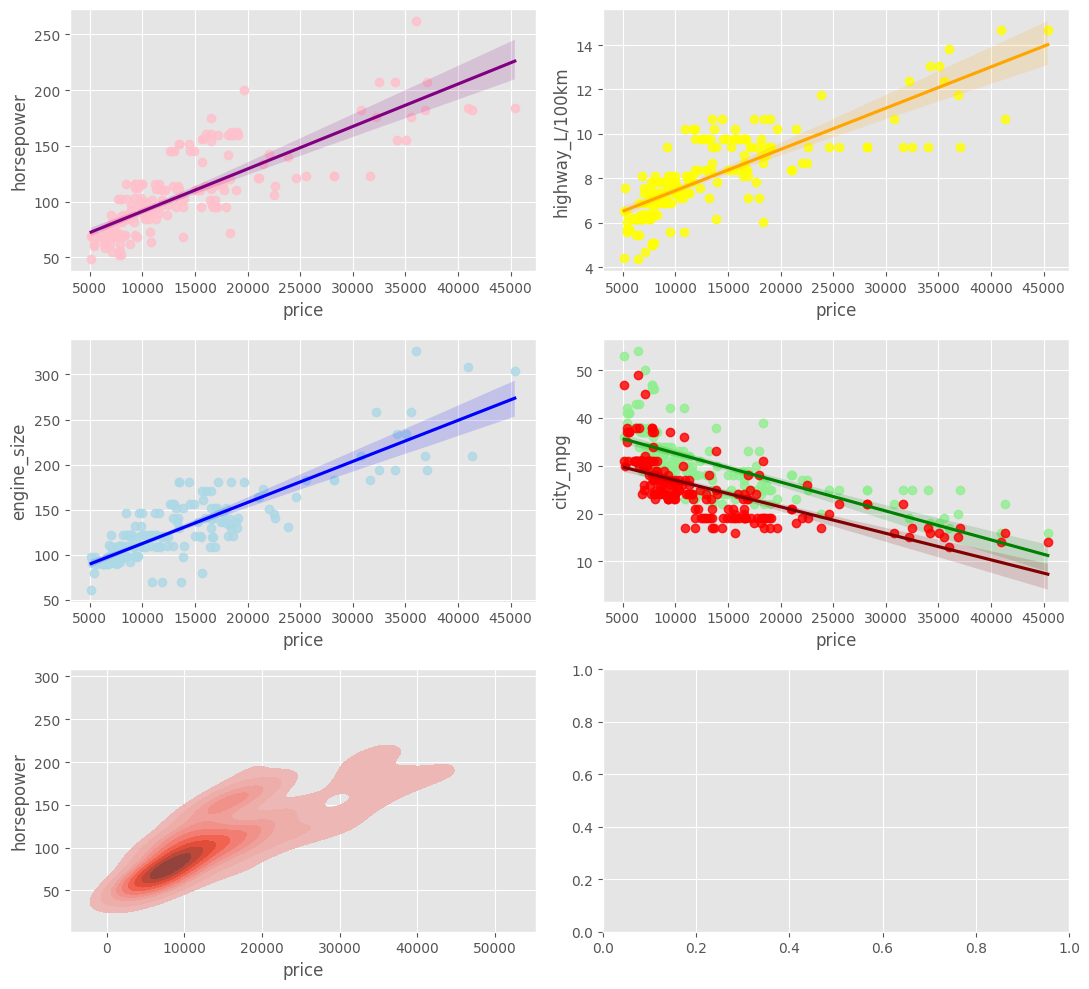

In [75]:
fig, ax = plt.subplots(3,2,figsize = (11,10))

ax1 = sns.regplot(x="price",y="horsepower",data=df,ax=ax[0,0],color="pink",line_kws={"color": "purple"})
ax2 = sns.regplot(x="price",y="highway_L/100km",data=df,ax=ax[0,1],color="yellow",line_kws={"color": "orange"})
ax3 = sns.regplot(x="price",y="engine_size",data=df,ax=ax[1,0],color="lightblue",line_kws={"color": "blue"})

ax4_1 = sns.regplot(x="price",y="highway_mpg",data=df,ax=ax[1,1],color="lightgreen",line_kws={"color": "green"})
ax4_2 = sns.regplot(x="price",y="city_mpg",data=df,ax=ax[1,1],color="red",line_kws={"color": "maroon"})

ax5 = sns.kdeplot(x="price",y="horsepower",data=df,ax=ax[2,0],fill=True)

fig.tight_layout()

In [76]:
df.corr(numeric_only=True)["price"]

symboling           -0.082391
normalized_losses    0.133999
wheel_base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb_weight          0.834415
engine_size          0.872335
bore                 0.543154
stroke               0.082267
compression_ratio    0.071107
horsepower           0.809681
peak_rpm            -0.101542
city_mpg            -0.686571
highway_mpg         -0.704692
price                1.000000
city_L/100km         0.789898
highway_L/100km      0.801118
fuel_type_diesel     0.110326
fuel_type_gas       -0.110326
aspiration_std      -0.179578
aspiration_turbo     0.179578
Name: price, dtype: float64

Horsepower and price correlation grouped by different car body styles

<AxesSubplot: xlabel='horsepower', ylabel='price'>

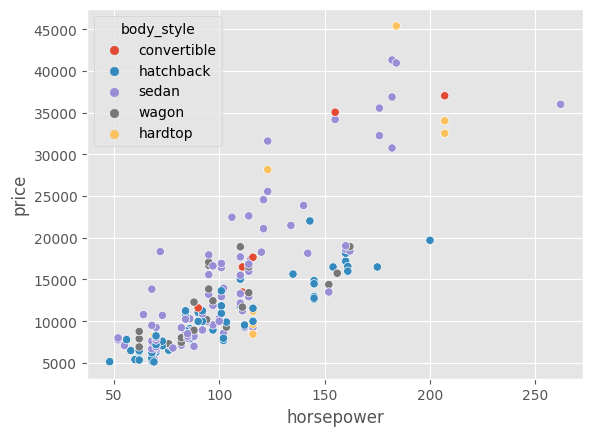

In [77]:
sns.scatterplot(x="horsepower",y="price",data=df,hue="body_style")

In [78]:
pivot3 = df.pivot_table(index="make",columns="body_style",values="price").dropna(thresh=4)
pivot3

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
mercedes-benz,35056.0,36788.000000,NaN,33074.000000,28248.000000
nissan,NaN,8249.000000,14409.0,8604.555556,9915.666667
toyota,17669.0,9762.333333,9616.0,9542.200000,9836.000000
volkswagen,11595.0,NaN,9980.0,9673.888889,12290.000000


Another categorical data relations and changing color map of heatmap

<AxesSubplot: xlabel='body_style', ylabel='make'>

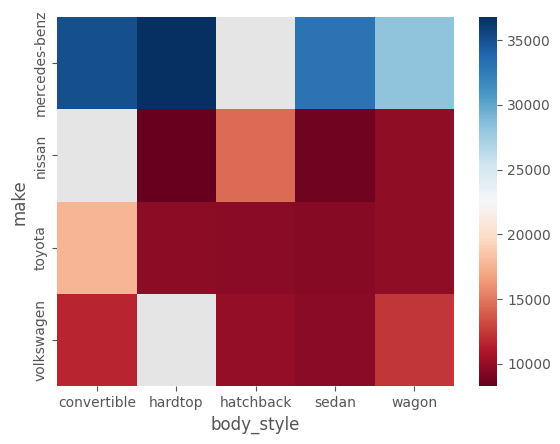

In [79]:
sns.heatmap(pivot3,cmap="RdBu")

Boxplots grouped by car brand and if car is considered fast or slow

In [80]:
df["horsepower"].describe()
df["fast_cars"] = df["horsepower"].apply(lambda x: "slow" if x < 100 else "fast")

<AxesSubplot: xlabel='make', ylabel='price'>

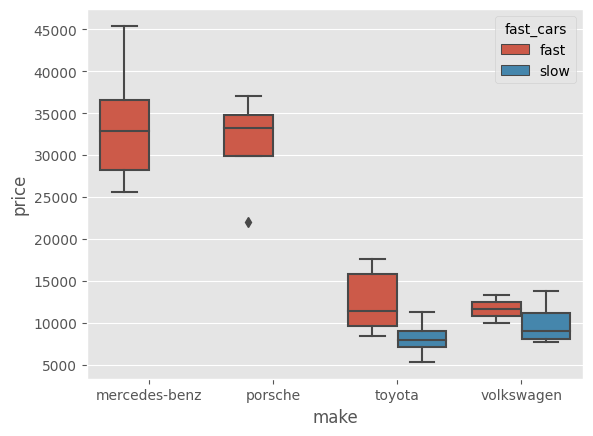

In [81]:
sns.boxplot(x="make",y="price",hue="fast_cars",data=df.loc[df["make"].isin(["mercedes-benz","toyota","volkswagen","porsche"])])

Another regression plot

<AxesSubplot: xlabel='highway_mpg', ylabel='price'>

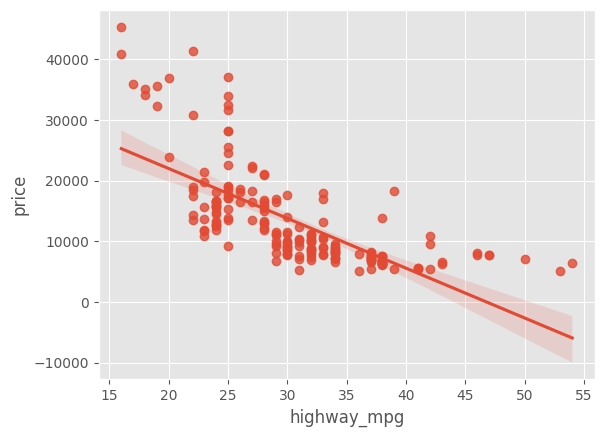

In [82]:
sns.regplot(x=df["highway_mpg"],y=df["price"])

Examine if data fits to regression line (residual plot)

<AxesSubplot: xlabel='highway_mpg', ylabel='price'>

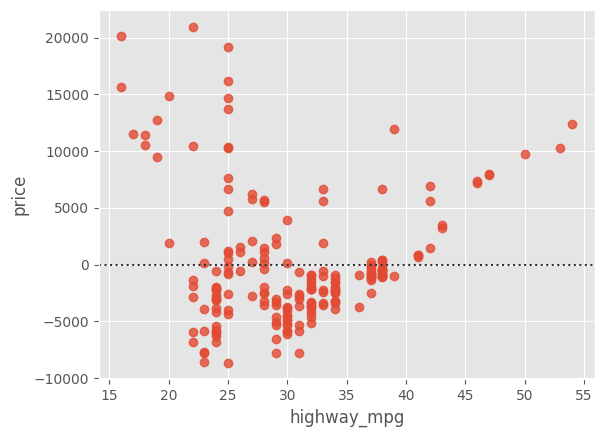

In [83]:
sns.residplot(x=df["highway_mpg"],y=df["price"])

### Playing with athlete_events.csv
data about olympic athletes from different countries

In [84]:
olympic = pd.read_csv("athlete_events.csv",index_col="ID")


In [85]:
olympic.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Compare height distribution of polish and french team members after year 1980 (histogram)

In [86]:
team = olympic.loc[olympic["Year"] > 1980].groupby("Team")

<AxesSubplot: xlabel='Height', ylabel='Percent'>

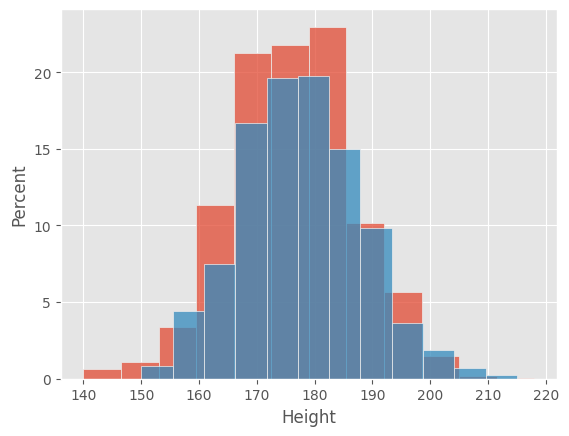

In [87]:
sns.histplot(team.get_group("France")["Height"],bins=12,stat="percent")
sns.histplot(team.get_group("Poland")["Height"],bins=12,stat="percent")

Compare USA and France based on gold, silver and bronze medals won (barplot)

In [91]:
teams = team["Medal"].value_counts()[["United States","France"]]
teams

Team           Medal 
United States  Gold      1233
               Silver     800
               Bronze     639
France         Bronze     263
               Silver     206
               Gold       198
Name: Medal, dtype: int64

array([0, 1, 2])

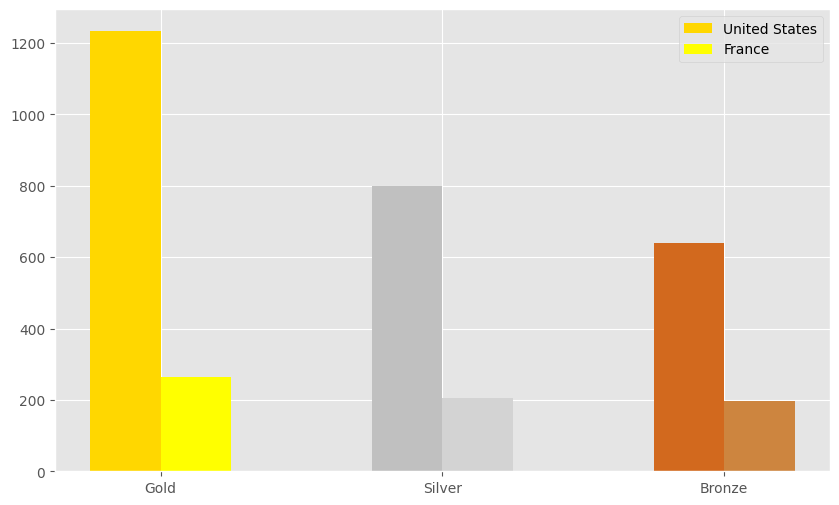

In [92]:
xticks = np.arange(0,3,1)

plt.figure(figsize = (10,6))

plt.xticks(xticks+(0.25/2),["Gold","Silver","Bronze"])

plt.bar(xticks,three["United States"].values,color=["gold","silver","chocolate"],width=0.25,label="United States")
plt.bar(xticks+0.25,three["France"].values,width=0.25, label="France",color=["yellow","lightgray","peru"])

plt.legend()


xticks